<a href="https://colab.research.google.com/github/SammriddhGupta/ML-web-app/blob/main/Housing_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/cleaned_data.csv', index_col='id')
train_df.head()

,city,state,bathrooms,bedrooms,livingArea,lotArea,lotUnit,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income
id,,,,,,,,,,,,,
0,Justin,TX,3.0,4.0,3078.0,7492.32,sqft,358100.0,0,0,1,0,46658.0
1,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,sqft,660000.0,0,0,1,0,57188.0
2,Anchorage,AK,2.0,3.0,1388.0,0.00,sqft,232500.0,1,0,0,0,66044.0
3,Berwick,ME,4.0,3.0,2972.0,79714.80,acres,551900.0,0,0,1,0,46016.0
4,Thornton,CO,3.0,2.0,1926.0,0.00,sqft,435000.0,0,0,0,1,65217.0


# Manually calculating the predictions

In [4]:
average_price = train_df['price'].mean()

average_price

335720.26146307314

In [5]:
mean_model_df = train_df.copy()

mean_model_df['predicted'] = 335720

mean_model_df['absolute_error'] = np.abs(mean_model_df['price'] - mean_model_df['predicted'])

In [6]:
mean_model_df['absolute_error'].mean()

141006.19828491425

(array([8524., 7274., 4223., 1634.,  563.,  325.,  198.,   75.,   27.,
          13.]),
 array([8.0000e+01, 8.6500e+04, 1.7292e+05, 2.5934e+05, 3.4576e+05,
        4.3218e+05, 5.1860e+05, 6.0502e+05, 6.9144e+05, 7.7786e+05,
        8.6428e+05]),
 <a list of 10 Patch objects>)

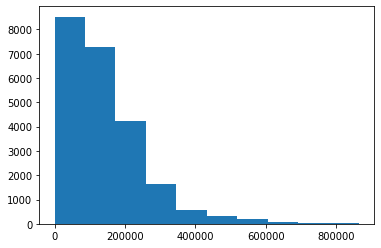

In [7]:
plt.hist(mean_model_df['absolute_error'])

# Using LivingArea in our manual 'model'

In [8]:
square_footage_model_df = train_df.copy()

In [9]:
# just creating a variable for checking's sake
average_price_per_square_foot = (square_footage_model_df['price'] / square_footage_model_df['livingArea']).mean()
average_price_per_square_foot

195.35527446966984

In [10]:
square_footage_model_df['price_per_sqft'] = square_footage_model_df['price'] / square_footage_model_df['livingArea']

square_footage_model_df['price_per_sqft'].mean()

195.35527446966984

In [11]:
# adding 2 columns to the df called 'predicted' and 'absolute error' 

square_footage_model_df['predicted'] = square_footage_model_df['livingArea'] * 195.3552744696684

square_footage_model_df['absolute_error'] = np.abs(square_footage_model_df['price'] - square_footage_model_df['predicted'])

In [13]:
square_footage_model_df['predicted']

id
0        601303.534818
1        727112.331576
2        271153.120964
3        580595.875724
4        376254.258629
             ...      
22851    474322.606412
22852    312568.439151
22853    313545.215524
22854    353593.046790
22855    173866.194278
Name: predicted, Length: 22856, dtype: float64

In [14]:
square_footage_model_df['absolute_error']

id
0        243203.534818
1         67112.331576
2         38653.120964
3         28695.875724
4         58745.741371
             ...      
22851    299322.606412
22852      7568.439151
22853      8545.215524
22854      6406.953210
22855     55233.805722
Name: absolute_error, Length: 22856, dtype: float64

In [16]:
# just having a look at the df now
square_footage_model_df.head()

,city,state,bathrooms,bedrooms,livingArea,lotArea,lotUnit,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income,price_per_sqft,predicted,absolute_error
id,,,,,,,,,,,,,,,,
0,Justin,TX,3.0,4.0,3078.0,7492.32,sqft,358100.0,0,0,1,0,46658.0,116.341780,601303.534818,243203.534818
1,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,sqft,660000.0,0,0,1,0,57188.0,177.324019,727112.331576,67112.331576
2,Anchorage,AK,2.0,3.0,1388.0,0.00,sqft,232500.0,1,0,0,0,66044.0,167.507205,271153.120964,38653.120964
3,Berwick,ME,4.0,3.0,2972.0,79714.80,acres,551900.0,0,0,1,0,46016.0,185.699865,580595.875724,28695.875724
4,Thornton,CO,3.0,2.0,1926.0,0.00,sqft,435000.0,0,0,0,1,65217.0,225.856698,376254.258629,58745.741371


(array([9277., 7208., 3609., 1517.,  589.,  251.,  156.,  134.,   73.,
          42.]),
 array([1.71312802e+01, 7.49540740e+04, 1.49891017e+05, 2.24827959e+05,
        2.99764902e+05, 3.74701845e+05, 4.49638788e+05, 5.24575730e+05,
        5.99512673e+05, 6.74449616e+05, 7.49386559e+05]),
 <a list of 10 Patch objects>)

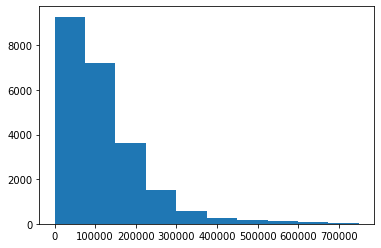

In [18]:
plt.hist(square_footage_model_df['absolute_error'])

In [19]:
# finding the mean of the absolute error
square_footage_model_df['absolute_error'].mean()

118263.06291222338

In [ ]:
# what we basically did above was linear regression 
# now let's use scikit learn to do this quickly

# Training Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg_df = train_df.copy()

In [21]:
input_data = lin_reg_df[['livingArea']]
output_data = lin_reg_df['price']

linear_regression_with_living_area_model = LinearRegression()

linear_regression_with_living_area_model.fit(input_data, output_data)

LinearRegression()

In [22]:
lin_reg_df['predicted'] = linear_regression_with_living_area_model.predict(input_data)

lin_reg_df['absolute_error'] = np.abs(lin_reg_df['predicted'] - lin_reg_df['price'])

(array([9371., 7634., 3596., 1175.,  424.,  230.,  143.,  144.,   91.,
          48.]),
 array([3.41430585e+00, 7.26338942e+04, 1.45264374e+05, 2.17894854e+05,
        2.90525334e+05, 3.63155814e+05, 4.35786294e+05, 5.08416774e+05,
        5.81047253e+05, 6.53677733e+05, 7.26308213e+05]),
 <a list of 10 Patch objects>)

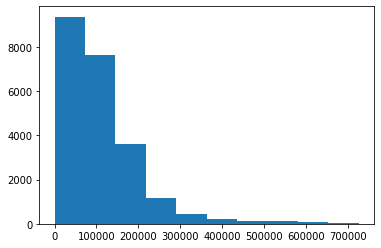

In [23]:
plt.hist(lin_reg_df['absolute_error'])

In [25]:
# calculating mean of the absolute errors
lin_reg_df['absolute_error'].mean(skipna=True)

110781.26218261379

In [27]:
# using scikit learn to calculate mean absolute error
from sklearn.metrics import mean_absolute_error

predictions = linear_regression_with_living_area_model.predict(input_data)

mean_absolute_error(lin_reg_df['price'], predictions)

110781.26218261366

In [28]:
# since both the above cells give an approximately same answer,we know we're on the right path

# let's give our model a bit more data to see if it helps 

lin_reg_df['livingAreaSquared'] = lin_reg_df['livingArea'] ** 2
lin_reg_df['livingAreaRooted'] = lin_reg_df['livingArea'] ** 0.5

input_data = lin_reg_df[['livingArea' , 'livingAreaSquared' , 'livingAreaRooted']]
output_data = lin_reg_df['price']

lr_on_living_area_nonlinear_model = LinearRegression()

lr_on_living_area_nonlinear_model.fit(input_data, output_data)

predictions = lr_on_living_area_nonlinear_model.predict(input_data)

mean_absolute_error(lin_reg_df['price'], predictions)

110734.39977210906

In [29]:
# so we got ever so slightly better, let's try adding more data now

columns = ['livingArea', 'livingAreaSquared', 'livingAreaRooted']

for i in range(2,5):
    column = f'livingAreaToThePowerOf{i}'
    columns.append(column)
    lin_reg_df[column] = lin_reg_df['livingArea'] ** i

input_data = lin_reg_df[columns]
output_data = lin_reg_df['price']

linear_regression_with_powers_model = LinearRegression()
linear_regression_with_powers_model.fit(input_data, output_data)

predictions = linear_regression_with_powers_model.predict(input_data)

mean_absolute_error(lin_reg_df['price'], predictions)

110711.49343302712

In [30]:
# so we can notice now that there was more improvement, albeit small on the overall scale

# now here we are prone to fall into the trap of overfitting
# let's check out what's happening using the technique of cross-validation

from sklearn.model_selection import train_test_split

X = train_df[['livingArea']]
y = train_df['price']

X_train, X_test , y_train, y_test = train_test_split( X , y , test_size=.2 , random_state=42 )

print(X_train)

X_test

       livingArea
id               
22195      1464.0
11288      2312.0
3481       1520.0
18786      1204.0
1357       2086.0
...           ...
11964      2054.0
21575      1476.0
5390       1200.0
860        1100.0
15795      1202.0

[18284 rows x 1 columns]


,livingArea
id,
5504,1343.0
8064,1724.0
19269,2165.0
14582,1143.0
4222,2760.0
...,...
19540,1425.0
7029,940.0
17746,1518.0


In [31]:
#running the linear regression model on test data

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_absolute_error(predictions, y_test)

109501.57384495749

In [32]:
# so we see here that with just 1 iteration, the results get technically worse

# Now performing cross validation by running it 4 times and putting random state as 'i' 

from sklearn.model_selection import train_test_split

X = train_df[['livingArea']]
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[109306.96102433567, 112630.12515163988, 111747.26282728216, 113210.77059663818]
average error: 111723.77989997398


In [33]:
# so see? our predictions are getting progressively worse
# this is the exact problem of overfitting
# we can solve overfitting by 
# (1) cross validation as we did above 
# (2) test your data on data other than what you worked on  
# (3) change values around   (4) add noise   (5) add more data

In [36]:
# now instead of just a piece of data i.e the train set, we load in our entire dataset for the model to run on

X = train_df.drop(['city', 'state' , 'lotUnit' , 'price'], axis=1)
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))
  
print(errors)
print(f'average error: {np.mean(errors)}')

[97526.55199002981, 100371.33994529149, 98706.8012014351, 100841.2220088005]
average error: 99361.47878638923


In [37]:
# so yay, we did improve when the entire data was loaded in
# now, it may seem like a lot of work, but let's try to one-hot encode state

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
X

,bathrooms,bedrooms,livingArea,lotArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,3078.0,7492.32,0,0,1,0,46658.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,5.0,3722.0,6577.56,0,0,1,0,57188.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1388.0,0.00,1,0,0,0,66044.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,2972.0,79714.80,0,0,1,0,46016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,1926.0,0.00,0,0,0,1,65217.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,2.0,3.0,2428.0,7840.80,0,0,1,0,21375.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22852,2.0,3.0,1600.0,3600.00,0,0,1,0,33125.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22853,2.0,3.0,1605.0,6150.00,0,0,1,0,30005.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# boom all states have been one hot encoded
# now let's see if it helped our predictions or not

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[60098.88785341301, 61515.42572347219, 60452.11167735503, 62165.674432656066]
average error: 61058.02492172407


In [39]:
# WOAH look at that! This is a massive improvement
# you see, even using a simple linear regression model helps us come within 60k of the actual price range

# Training Neural Network Model

In [40]:
from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = MLPRegressor()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[102524.52424921618, 103211.78907062276, 102941.27095518392, 103339.90637807455]
average error: 103004.37266327435


In [41]:
# wait this is surprising isn't it? The neural network model performs worse than Linear Regression
# one of the reasons is our data is not normalized
# another point to note is when doing Linear Regression, normalization doesn't help neural networks a lot
# A major reason could be that neural networks work better on much more data
# what we can try doing is changing the shape of our neural network, by adding the hidden layers so let's try that

from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(1):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = MLPRegressor(hidden_layer_sizes=[20,5])
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[101790.23346858959]
average error: 101790.23346858959


In [42]:
from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(1):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=i)
  model = MLPRegressor(hidden_layer_sizes=[40,20,5])
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions , y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[334546.7355129649]
average error: 334546.7355129649


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [43]:
# so it isn't working as well as we expected but it's working nevertheless

# and there we go, we have made 2 simple models to predict our prices

# Training on test data and pickling the model file to run it on repl.it

In [44]:
# we decide that Linear Regression is definitely the better of the 2 models so we go ahead with it as our final model

final_model = LinearRegression()

final_training_input = pd.get_dummies(train_df.drop(['city', 'lotUnit', 'price'], axis=1), columns=['state'])

X = pd.get_dummies(final_training_input)
y = train_df['price']
final_model.fit(X, y)

LinearRegression()

In [47]:
# now we'll have to perform all the cleaning and preprocessing again so let's just do it in one go

test = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/test.csv', index_col='id')

test.drop(['homeStatus', 'dateSold', 'address'], axis=1, inplace=True)

def convert_lot_area(row):
    if row['lotUnit'] == 'acres':
        return row['lotArea'] * 43560
    else:
        return row['lotArea']

test['lotArea'] = test.apply(convert_lot_area, axis=1)

test.drop(['lotUnit'], inplace=True, axis=1)

test = pd.get_dummies(test, columns=['homeType'])

print(test.head())

zip_code_df = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/median_income_by_zip_code.csv')

zip_code_df['median_income']

test = pd.merge(test, zip_code_df, how='left', left_on='zipcode', right_on='zip_code').set_index(test.index)

test['median_income'].fillna(test['median_income'].mean(), inplace=True)

test.drop(['zipcode', 'zip_code'], axis=1, inplace=True)

test.head()

       zipcode           city  ... homeType_SINGLE_FAMILY  homeType_TOWNHOUSE
id                             ...                                           
22805  19970.0     Ocean View  ...                      1                   0
18392  27704.0         Durham  ...                      1                   0
15215  20733.0      Churchton  ...                      1                   0
20235  33064.0  Pompano Beach  ...                      1                   0
13810   6239.0      Killingly  ...                      1                   0

[5 rows x 11 columns]


,city,state,bathrooms,bedrooms,livingArea,lotArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income
id,,,,,,,,,,,
22805,Ocean View,DE,4.0,5.0,4100.0,10454.4,0,0,1,0,49786.0
18392,Durham,NC,3.0,4.0,2055.0,12632.4,0,0,1,0,37513.0
15215,Churchton,MD,2.0,3.0,1530.0,4791.6,0,0,1,0,41087.0
20235,Pompano Beach,FL,1.0,3.0,744.0,6120.0,0,0,1,0,37070.0
13810,Killingly,CT,3.0,6.0,4166.0,37.0,0,0,1,0,33438.0


In [48]:
final_input = pd.get_dummies(test.drop(['city'], axis=1), columns=['state'])

final_input

,bathrooms,bedrooms,livingArea,lotArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22805,4.0,5.0,4100.0,10454.4,0,0,1,0,49786.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18392,3.0,4.0,2055.0,12632.4,0,0,1,0,37513.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15215,2.0,3.0,1530.0,4791.6,0,0,1,0,41087.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20235,1.0,3.0,744.0,6120.0,0,0,1,0,37070.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13810,3.0,6.0,4166.0,37.0,0,0,1,0,33438.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,2.0,2.0,1560.0,7405.2,0,1,0,0,26250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23860,4.0,5.0,3860.0,0.0,0,0,1,0,55217.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1450,2.0,3.0,1169.0,0.0,0,0,0,1,32552.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
test['price'] = final_model.predict(final_input)

test.head()

,city,state,bathrooms,bedrooms,livingArea,lotArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income,price
id,,,,,,,,,,,,
22805,Ocean View,DE,4.0,5.0,4100.0,10454.4,0,0,1,0,49786.0,638957.644279
18392,Durham,NC,3.0,4.0,2055.0,12632.4,0,0,1,0,37513.0,364689.101898
15215,Churchton,MD,2.0,3.0,1530.0,4791.6,0,0,1,0,41087.0,285338.263657
20235,Pompano Beach,FL,1.0,3.0,744.0,6120.0,0,0,1,0,37070.0,226696.704651
13810,Killingly,CT,3.0,6.0,4166.0,37.0,0,0,1,0,33438.0,561474.716545


In [51]:
X = pd.get_dummies(train_df.drop(['city', 'lotUnit' , 'price'], axis=1), columns=['state'])
y = train_df['price'] 

model = LinearRegression()
model.fit(X,y)
test['price'] = model.predict(final_input)

In [52]:
# we download this pickled model.pk file and upload it to our repl.it app

import pickle

with open('model.pk', mode='wb+') as model_file:
  pickle.dump(model, model_file)